# Question 2

## Part 1

$$ L(s,b) = \frac{(s+b)^n e^{-(s+b)}}{n!} $$
To calculate the p value for the background only i.e $s=0$, with $n=15, b=2.8$ we have to use the following formula with the cumulative $\chi^2$ distribution function. 

$$ p = 1 - \sum_{n=0}^{m} (n;v) = 1 - [ 1- F_{\chi^2} (2 \nu; n_{dof})] $$

In the case of this question $m=14$ because we are going from $n=15 \rightarrow \infty$ to our sum is then $n=0 \rightarrow m=14$. We also have $\nu = s+b = b$ and the degrees of freedom $n_{dof} = 2(m+1) = 30$. This can also be explictly verified using a chi2 applet for $F_{\chi^2} (\nu = 5.6, n_{dof} = 30)$ where $2\nu = 2 b = 5.6$.

$$ \text{p-value}= 2.9 \times 10^{-7} $$

## Part 2

For the second part we have to calculate how many standard deviations (=std) from a standard gaussian. To calculate this we use 
$$ \sigma = \sqrt{1-p} $$ 
It is easy to see that this is just the square root of the poisson function or the square root of 1- p-value. The standard normal distribution has $\mu =0, \sigma =1$ so we can use the $ppf$ (percent points function or Quartile function) to return the significance. The signifiance is greater than 5 so it is a new discovery.
$$ Z= 5.132042  $$

## Part 3

For part 3 we introduce a new function in the code which is the Likelihood ratio, simply likelihood for $s$ over likelihood for $\hat{s}$. To get $\hat{s}$ we have to maximise $L(s,b)$ i.e $\frac{\partial L}{\partial b} = 0$. Analytically this is 
$$ \frac{\partial L}{\partial b} = \frac{n e^{-(s+b)} (s+b)^{n-1} - e^{-(s+b)} (s+b)^n }{n!} $$
We know that $b > 0, s> 0$ so 
$$ (s+b)^{n-1} (n-(s+1)) = 0 $$
So either $(s+b) =0$ or $n-(s+b) = 0$ and $\hat{s} = n-b$. This is verified graphically (desmos.com) and introduced as a function for which the likelihood ratio depends on. In the code below I plotted $-2 \ln \lambda(\hat{b}, n) $ vs $s$ like in the hint and used $scipy$ to find the confidence intervals matching the roots of the plot for when $-2 \ln \lambda = 1$. 

## Part 4

Part 4 was particularly tricky but the hint and reference helped. I now introduced a new function for the likelihood ratio using a $b$ as a uniformly distributed random number between $[b-\sigma_b], [b+\sigma_b]$. Note that a 1 $\sigma$ confidence interval is $68.3\%$ for a standard gaussian distributed. So to find the CI I find the ratio of the likelihood function which is less than or equal to 1 by introducing another function which finds the amount under 1 and then finding fraction of them. This fraction was plotted and shows that it has very similar roots to part 3 with very similar confidence interval. I am not sure if I avoided undercoverage or not with this method. 

## Code 

p-value: 2.866153162583984e-07
P-value corresponds to 5.132042 standard deviations
sol1 x = 12.20000
-------------------------------------------------
s for part 3 with +- uncertainties from scipy
s = 12.200 + 4.213, - 3.547
-------------------------------------------------
s for part 4 with +- uncertainties from scipy
s = 12.200 + 4.010, - 3.343


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: RuntimeWarning: divide by zero encountered in log
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:97: RuntimeWarning: divide by zero encountered in log


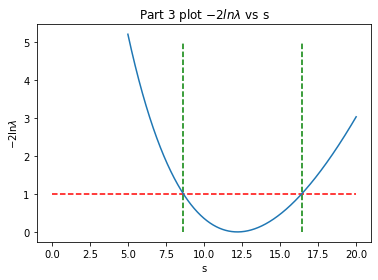

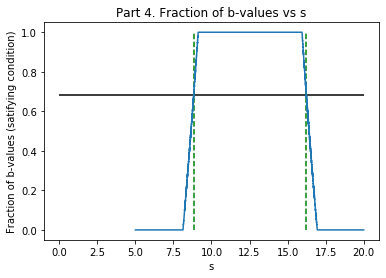

In [64]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize
import scipy.stats

#functions
def likelihood(s, b, n):
    return ((s+b)**n * np.exp(-(s+b))) / np.math.factorial(n)


def poisson_func(m, v):
    n_dof = 2*(m+1)
    return 1 - scipy.stats.chi2.cdf(2*v, n_dof)


def s_hat(b, n):
    return n - b


def likelihood_ratio(s, b, n):
    return likelihood(s, b, n) / likelihood(s_hat(b, n), b, n)


def likelihood_ratio_b_uniform(s, b, n, b_hat):
    return likelihood(s, b_hat, n) / likelihood(s_hat(b, n), b_hat, n)


def likelihood_ratio_under_limit(s, b, n,sigma_b): #n_b = 10000, limit=1
    b_arr = np.random.uniform(b-sigma_b,b+sigma_b,10000)
    frac_sat_con = np.sum(-2*np.log(likelihood_ratio_b_uniform(s, b, n, b_arr)) <= 1) / 10000
    return frac_sat_con


#init
b=2.8
n_obs = 15
m = n_obs-1

s=0
v = s+b
Poi= poisson_func(m, v) 
p=1-Poi
print("p-value:", p)

std = np.sqrt(Poi)
n_sigma = scipy.stats.norm.ppf(std)
print("P-value corresponds to %f standard deviations" %n_sigma)


plt.figure(1)

s_arr = np.linspace(5,20, 10000)
plt.plot(s_arr, -2*np.log(likelihood_ratio(s_arr, b, n_obs)))
plt.title("Part 3 plot $-2ln \lambda$ vs s")
plt.xlabel("s")
plt.ylabel(r"$-2\ln \lambda$")


sol1_min = scipy.optimize.minimize_scalar(lambda s: -2*np.log(likelihood_ratio(s, b, n_obs)), bracket=show_range)
print("sol1 x = %.5f" %sol1_min.x)
#print(sol1_min)

sol1_lower = scipy.optimize.root_scalar(lambda s: -2*np.log(likelihood_ratio(s, b, n_obs)) - 1, bracket=[show_range[0], sol_min.x])
sol1_upper = scipy.optimize.root_scalar(lambda s: -2*np.log(likelihood_ratio(s, b, n_obs)) - 1, bracket=[sol_min.x, show_range[1]])
#print(sol1_lower)
#print(sol1_upper)

plt.hlines(1,0,20,  colors='Red', linestyle='dashed')
plt.vlines(sol_lower.root, 0, 5, colors='Green', linestyle='dashed')
plt.vlines(sol_upper.root, 0, 5, colors='Green', linestyle='dashed')
print("-------------------------------------------------")

print("s for part 3 with +- uncertainties from scipy")
print("s = %.3f + %.3f, - %.3f" %(s_hat(b, n_obs),sol_upper.root - s_hat(b, n_obs),s_hat(b, n_obs) - sol_lower.root))



sigma_b = 0.5



frac_arr = np.zeros_like(s_arr)
for i in range(fracs.size):
    frac_arr[i] = likelihood_ratio_under_limit(s_arr[i], b, n_obs, sigma_b)
plt.figure(2)
plt.plot(s_arr, frac_arr)
plt.title("Part 4. Fraction of b-values vs s")
plt.xlabel("s")
plt. ylabel("Fraction of b-values (satifying condition)")

frac_limit = scipy.stats.norm.cdf(1) - scipy.stats.norm.cdf(-1)
plt.hlines(frac_limit, 0,20)

sol2_lower = scipy.optimize.root_scalar(
    lambda s: -2*np.log(likelihood_ratio_under_limit(s, b, n_obs, sigma_b)) - frac_limit,bracket=[show_range[0], sol_min.x])
sol2_upper = scipy.optimize.root_scalar(
    lambda s: -2*np.log(likelihood_ratio_under_limit(s, b, n_obs, sigma_b)) - frac_limit,bracket=[sol_min.x, show_range[1]])
#print(sol2_lower)
#print(sol2_upper)

plt.vlines(sol2_lower.root,0,1, colors='Green', linestyle='dashed')
plt.vlines(sol2_upper.root,0,1, colors='Green', linestyle='dashed')
print("-------------------------------------------------")
print("s for part 4 with +- uncertainties from scipy")

print("s = %.3f + %.3f, - %.3f" %(s_hat(b, n_obs),sol2_upper.root - s_hat(b, n_obs),s_hat(b, n_obs) - sol2_lower.root))

